In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

# UNDERSTANDING THE DATA

In [3]:
df=pd.read_csv(r"C:/Users/home/Documents/Microsoft Engage Project/cars_details_2022.csv")

In [5]:
df['Power']

0        38PS@5500rpm
1        38PS@5500rpm
2        38PS@5500rpm
3        38PS@5500rpm
4        38PS@5500rpm
            ...      
1271    100PS@3600rpm
1272    100PS@3600rpm
1273    119PS@6600rpm
1274    119PS@6600rpm
1275    202ps@3800rpm
Name: Power, Length: 1276, dtype: object

In [3]:
df.head(10)

Unnamed: 0    Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0    Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1    Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2    Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3    Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4    Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   
5           5    Tata  Nano Genx      Xma      Rs. 3,14,815       624 cc   
6           6  Datsun    Redi-Go        D      Rs. 2,79,650       799 cc   
7           7  Datsun    Redi-Go        T      Rs. 3,51,832       799 cc   
8           8  Datsun    Redi-Go        A      Rs. 3,33,419       799 cc   
9           9  Datsun    Redi-Go        S      Rs. 3,62,000       799 cc   

   Cylinders  Valves_Per_Cylinder               Drivetrain  \
0        2.0                  2.0   RWD (Rear Wheel Drive)   
1        2.0                  2.0   RWD (Rear Wheel Drive)   
2        2.0                  2.0   RWD (Rear Wheel Drive)   
3        2.0                  2.0   RWD (Rear Wheel Drive)   
4        2.0                  2.0   RWD (Rear Wheel Drive)   
5        2.0                  2.0   RWD (Rear Wheel Drive)   
6        3.0                  4.0  FWD (Front Wheel Drive)   
7        3.0                  4.0  FWD (Front Wheel Drive)   
8        3.0                  4.0  FWD (Front Wheel Drive)   
9        3.0                  4.0  FWD (Front Wheel Drive)   

  Cylinder_Configuration Emission_Norm    Engine_Location Fuel_System  \
0                In-line         BS IV   Rear, Transverse   Injection   
1                In-line         BS IV   Rear, Transverse   Injection   
2                In-line         BS IV   Rear, Transverse   Injection   
3                In-line         BS IV   Rear, Transverse   Injection   
4                In-line         BS IV   Rear, Transverse   Injection   
5                In-line         BS IV   Rear, Transverse   Injection   
6                In-line         BS IV  Front, Transverse   Injection   
7                In-line         BS IV  Front, Transverse   Injection   
8                In-line         BS IV  Front, Transverse   Injection   
9                In-line         BS IV  Front, Transverse   Injection   

  Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors  \
0          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
1          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
2          15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback    4.0   
3          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
4          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
5          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
6          28 litres    Petrol  1541 mm  3429 mm  1560 mm  Hatchback    5.0   
7          28 litres    Petrol  1541 mm  3429 mm  1560 mm  Hatchback    5.0   
8          28 litres    Petrol  1541 mm  3429 mm  1560 mm  Hatchback    5.0   
9          28 litres    Petrol  1541 mm  3429 mm  1560 mm  Hatchback    5.0   

   ... Rear_Center_Armrest iPod_Compatibility  \
0  ...                 NaN                NaN   
1  ...                 NaN                NaN   
2  ...                 NaN                NaN   
3  ...                 NaN                NaN   
4  ...                 NaN                NaN   
5  ...                 NaN                NaN   
6  ...                 NaN                NaN   
7  ...                 NaN                NaN   
8  ...                 NaN                NaN   
9  ...                 NaN                NaN   

  ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
0                                NaN              NaN   
1                                NaN              NaN   
2                                NaN              NaN   
3                                NaN     

In [4]:
df.Make.unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [5]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

In [6]:
df.shape

(1276, 141)

In [7]:
df.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [8]:
df.info

<bound method DataFrame.info of       Unnamed: 0        Make      Model        Variant Ex-Showroom_Price  \
0              0        Tata  Nano Genx             Xt      Rs. 2,92,667   
1              1        Tata  Nano Genx             Xe      Rs. 2,36,447   
2              2        Tata  Nano Genx        Emax Xm      Rs. 2,96,661   
3              3        Tata  Nano Genx            Xta      Rs. 3,34,768   
4              4        Tata  Nano Genx             Xm      Rs. 2,72,223   
...          ...         ...        ...            ...               ...   
1271        1271       Honda       City   Vx Mt Diesel     Rs. 13,02,000   
1272        1272       Honda       City   Zx Mt Diesel     Rs. 14,21,000   
1273        1273       Honda       City  Zx Cvt Petrol     Rs. 14,31,000   
1274        1274       Honda       City   V Cvt Petrol     Rs. 12,01,000   
1275        1275  Mitsubishi    Montero         3.2 At     Rs. 68,62,560   

     Displacement  Cylinders  Valves_Per_Cylinder      

### Here we can observe that there are so many null values in the last columns which can provide a problem while analyzing the data, so we have to clean the dataset to make accurate analysis and provide proper solution.

In [9]:
df.describe().T

count        mean         std  min     25%    50%  \
Unnamed: 0           1276.0  637.500000  368.493781  0.0  318.75  637.5   
Cylinders            1210.0    4.380992    1.660957  2.0    4.00    4.0   
Valves_Per_Cylinder  1174.0    3.977853    0.833763  1.0    4.00    4.0   
Doors                1272.0    4.550314    0.747816  2.0    4.00    5.0   
Seating_Capacity     1270.0    5.270079    1.145231  2.0    5.00    5.0   
Number_of_Airbags    1141.0    3.787029    2.522399  1.0    2.00    2.0   
USB_Ports              29.0    1.793103    0.773642  1.0    1.00    2.0   

                        75%     max  
Unnamed: 0           956.25  1275.0  
Cylinders              4.00    16.0  
Valves_Per_Cylinder    4.00    16.0  
Doors                  5.00     5.0  
Seating_Capacity       5.00    16.0  
Number_of_Airbags      6.00    14.0  
USB_Ports              2.00     3.0

In [10]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

# CLEANING THE DATA

In [11]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [12]:
df.tail(10)

make    model                 car        variant body_type  \
1266       Honda     City          Honda City    V Mt Petrol     Sedan   
1267       Honda     City          Honda City   Vx Mt Petrol     Sedan   
1268       Honda     City          Honda City  Vx Cvt Petrol     Sedan   
1269       Honda     City          Honda City   Sv Mt Diesel     Sedan   
1270       Honda     City          Honda City    V Mt Diesel     Sedan   
1271       Honda     City          Honda City   Vx Mt Diesel     Sedan   
1272       Honda     City          Honda City   Zx Mt Diesel     Sedan   
1273       Honda     City          Honda City  Zx Cvt Petrol     Sedan   
1274       Honda     City          Honda City   V Cvt Petrol     Sedan   
1275  Mitsubishi  Montero  Mitsubishi Montero         3.2 At       SUV   

     fuel_type fuel_system       type               drivetrain  displacement  \
1266    Petrol   Injection     Manual  FWD (Front Wheel Drive)          1497   
1267    Petrol   Injection     Manual  FWD (Front Wheel Drive)          1497   
1268    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1497   
1269    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1498   
1270    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1498   
1271    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1498   
1272    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1498   
1273    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1497   
1274    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1497   
1275    Diesel   Injection  Automatic    AWD (All Wheel Drive)          3200   

      cylinders  mileage   power  torque  fuel_tank  height  length   width  \
1266          4    17.80  117.37     145       40.0  1495.0  4440.0  1695.0   
1267          4    17.40  117.37     145       40.0  1495.0  4440.0  1695.0   
1268          4    18.00  117.37     145       40.0  1495.0  4440.0  1695.0   
1269          4    25.60   98.63     200       40.0  1495.0  4440.0  1695.0   
1270          4    25.60   98.63     200       40.0  1495.0  4440.0  1695.0   
1271          4    25.10   98.63     200       40.0  1495.0  4440.0  1695.0   
1272          4    25.10   98.63     200       40.0  1495.0  4440.0  1695.0   
1273          4    22.60  117.37     145       40.0  1495.0  4440.0  1695.0   
1274          4    17.80  117.37     145       40.0  1495.0  4440.0  1695.0   
1275          4    11.56  199.24     441       88.0  1900.0  4900.0  1875.0   

      doors  seats  wheelbase  airbags  price  
1266      4      5     2600.0        2  14922  
1267      4      5     2600.0        2  16548  
1268      4      5     2600.0        2  18368  
1269      4      5     2600.0        2  15554  
1270      4      5     2600.0        2  16674  
1271      4      5     2600.0        2  18228  
1272      4      5     2600.0        6  19894  
1273      4      5     2600.0        6  20034  
1274      4      5     2600.0        2  16814  
1275      5      7     2780.0        6  96075

In [13]:
  df.to_csv('raw_data.csv', index=False)

In [14]:
df.isnull().sum()

make            0
model           0
car             0
variant         0
body_type       0
fuel_type       0
fuel_system     1
type            0
drivetrain      1
displacement    0
cylinders       0
mileage         0
power           0
torque          0
fuel_tank       0
height          0
length          0
width           0
doors           0
seats           0
wheelbase       0
airbags         0
price           0
dtype: int64

# ANALYSIS OF THE DATA

**Now we can find main features regarding the cars dataset.**

In [15]:
df.describe().T

count          mean            std       min       25%  \
displacement  987.0   1759.184397     924.993708   624.000   1198.00   
cylinders     987.0      4.220871       1.380041     2.000      4.00   
mileage       987.0     18.515380       4.588321     3.400     16.00   
power         987.0    141.617224     116.238232    33.530     81.86   
torque        987.0    244.030395     162.614837    10.000    120.00   
fuel_tank     987.0     50.920871      15.318039    24.000     40.00   
height        987.0   1583.807340     152.821356     1.845   1495.00   
length        987.0   4252.248875     447.163835     4.640   3985.00   
width         987.0   1775.582416     144.234947     1.845   1695.00   
doors         987.0      4.570415       0.714850     2.000      4.00   
seats         987.0      5.266464       1.085082     2.000      5.00   
wheelbase     987.0   2606.583587     180.699575  1840.000   2470.00   
airbags       987.0      3.175279       2.500847     0.000      2.00   
price         987.0  48009.175279  105460.579796  3310.000  10104.50   

                   50%       75%        max  
displacement   1496.00   1988.00    6752.00  
cylinders         4.00      4.00      12.00  
mileage          18.49     21.70      28.40  
power           102.58    152.88     778.21  
torque          200.00    320.00    1712.00  
fuel_tank        45.00     60.00     105.00  
height         1549.00   1655.00    2055.00  
length         4315.00   4568.00    5575.00  
width          1745.00   1832.00    2226.00  
doors             5.00      5.00       5.00  
seats             5.00      5.00       9.00  
wheelbase      2590.00   2700.00    3266.00  
airbags           2.00      6.00      14.00  
price         13994.00  27626.50  744944.00

In [16]:
df[df.model =='Corolla Altis']

make          model                   car       variant body_type  \
734  Toyota  Corolla Altis  Toyota Corolla Altis      G Petrol     Sedan   
735  Toyota  Corolla Altis  Toyota Corolla Altis   G At Petrol     Sedan   
736  Toyota  Corolla Altis  Toyota Corolla Altis     Gl Petrol     Sedan   
737  Toyota  Corolla Altis  Toyota Corolla Altis     Gl Diesel     Sedan   
738  Toyota  Corolla Altis  Toyota Corolla Altis      G Diesel     Sedan   
739  Toyota  Corolla Altis  Toyota Corolla Altis  Vl At Petrol     Sedan   

    fuel_type fuel_system       type               drivetrain  displacement  \
734    Petrol   Injection     Manual  FWD (Front Wheel Drive)          1798   
735    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1798   
736    Petrol   Injection     Manual  FWD (Front Wheel Drive)          1798   
737    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1364   
738    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1364   
739    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1798   

     cylinders  mileage   power  torque  fuel_tank  height  length   width  \
734          4     16.7  138.08     173       55.0  1475.0  4620.0  1775.0   
735          4     16.7  138.08     173       55.0  1475.0  4620.0  1775.0   
736          4     16.7  138.08     173       55.0  1475.0  4620.0  1775.0   
737          4     21.0   86.80     205       43.0  1475.0  4620.0  1775.0   
738          4     21.0   86.80     205       43.0  1475.0  4620.0  1775.0   
739          4     16.7  138.08     173       55.0  1475.0  4620.0  1775.0   

     doors  seats  wheelbase  airbags  price  
734      4      5     2700.0        3  23030  
735      4      5     2700.0        3  25284  
736      4      5     2700.0        7  26348  
737      4      5     2700.0        3  27104  
738      4      5     2700.0        3  24794  
739      4      5     2700.0        7  28266

We selected the model **Toyota Corolla Altis** and we can see that there are 6 variants of the car in the market.

### Now let us check the distribution of some features in the dataset,
### Firstly let us Check the price distribution, we will use both normal and log scales due to the huge difference in the prices

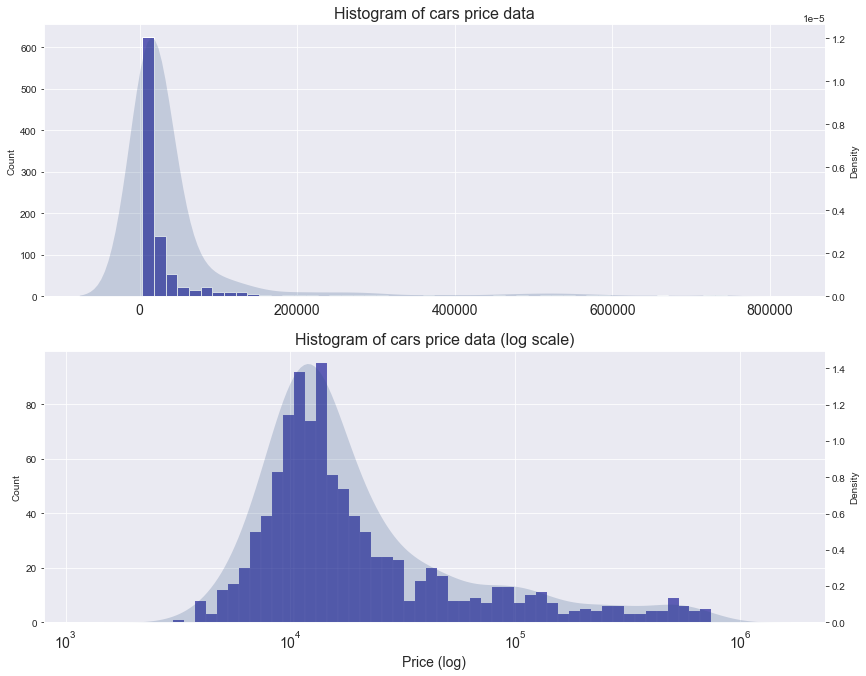

In [17]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

Seems like there is a lot of varaince in price, we can check that by plotting a box plot below

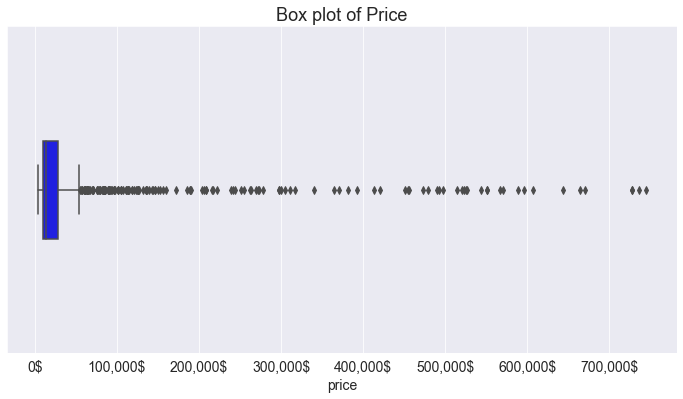

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

* Here we can observe that most of the car prices lie in the range 0-300,000 dollars
* It seems that there is a lot of outliers that form a very different type(s) of cars or to be mor exact there are very different categories in the automotive market.

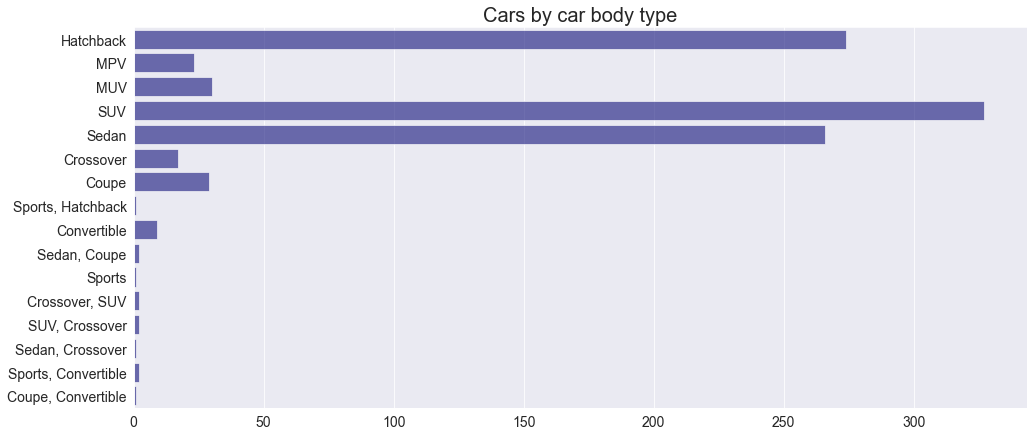

In [19]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

## SUV's Sedans and hatchbacks seems to be the dominating car types

# Analyzing the relationship between different entities in the dataset:-

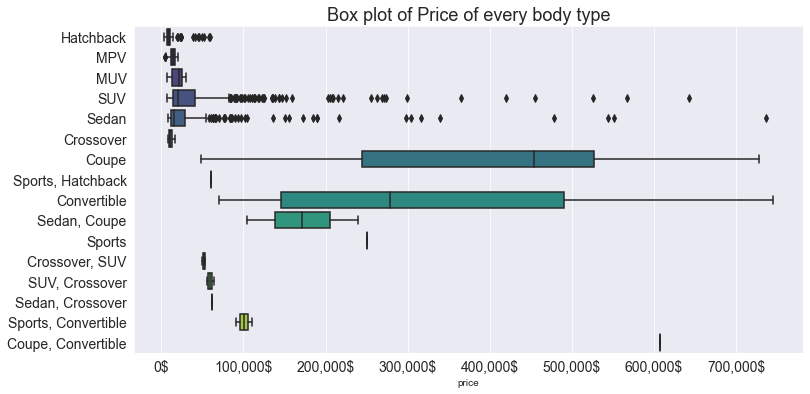

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

### It's Clear that Car body type strongly affect the price and are corelated with each other 

## > Now let us check cars by Fuel type

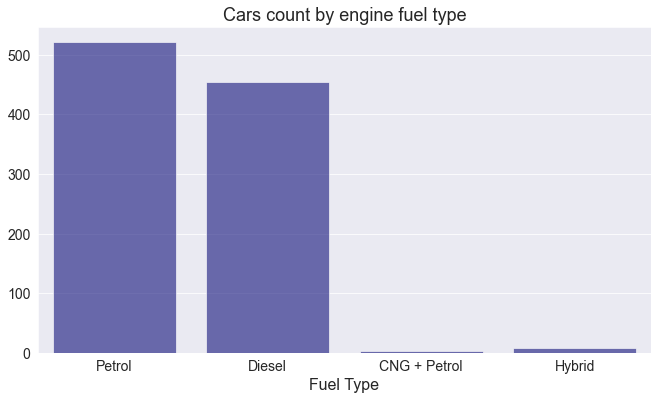

In [21]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

### From the above data we can observe that most of the cars seems to be run on Petrol or Diesel

## > Now let us check the cars by engine size

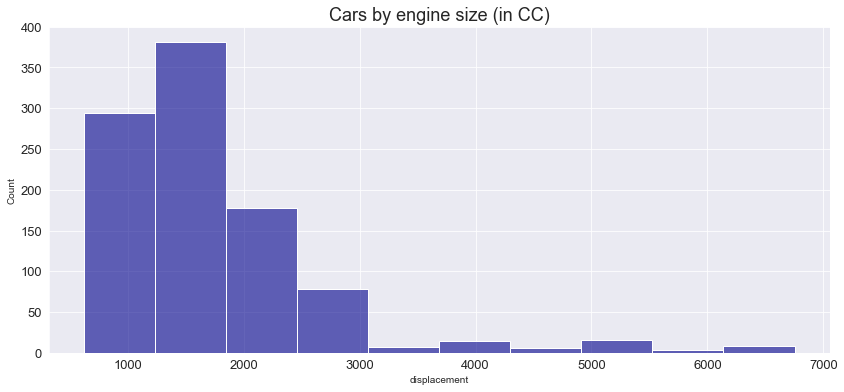

In [22]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

### From the above plot we can observe that most of cars have engine size in the 1000:2000cc range

## > Now let us check the Horsepower of cars:-

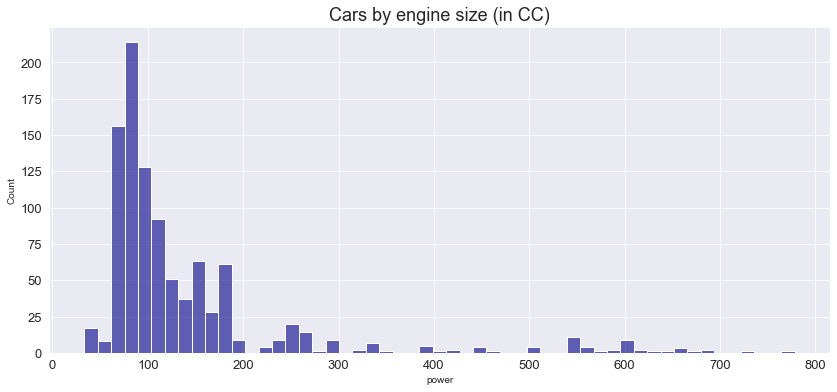

In [23]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in CC)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

## > Then we check the relation horsepower and price considering diffreent body type

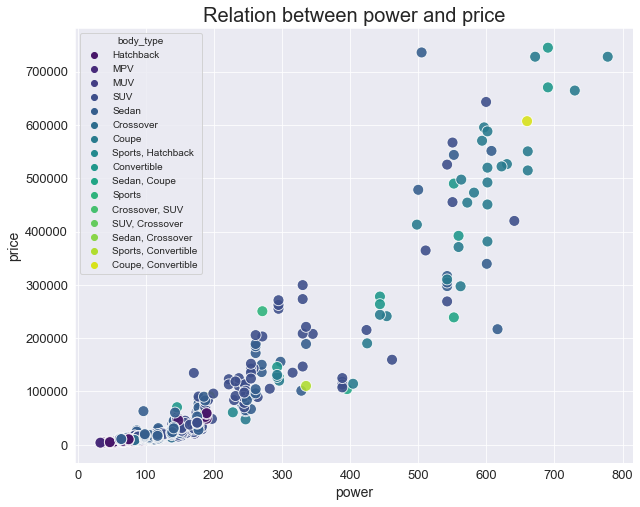

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);


 ### From the above scatterplot we can say that:-
* ### Horsepower of car seems to be highly related to car price but car body type seems a little bit blurry 
* ### Hatchbacks seems to be the body type with the least horsepower and price

##  > Now let us also look into the relation between Mileage and price

<Figure size 720x576 with 0 Axes>

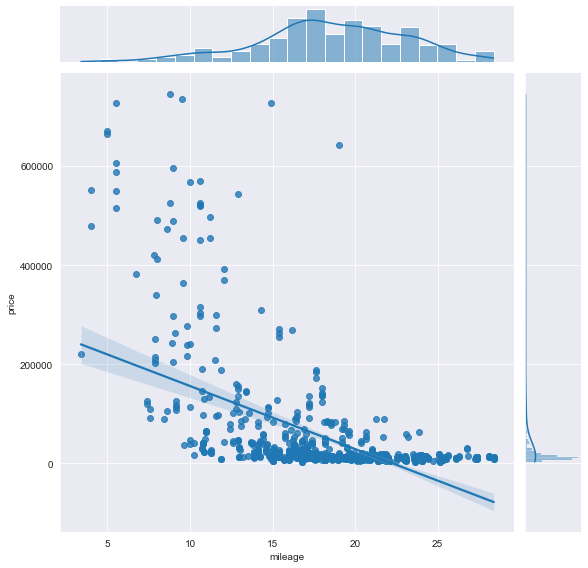

In [25]:
plt.figure(figsize=(10,8))
ax= fig.add_subplot()
sns.jointplot(data=df, x='mileage', y='price',kind= 'reg',ax=ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'Relation between Power and price', fontsize=18)
ax.set_xlabel('Power (HP)', fontsize= 15);

### From the above plots we can conclude that expensive cars tend to have worse mileage

## > We can also check the overall correlation between variables with each other
### For this we make a pearson correlation grid

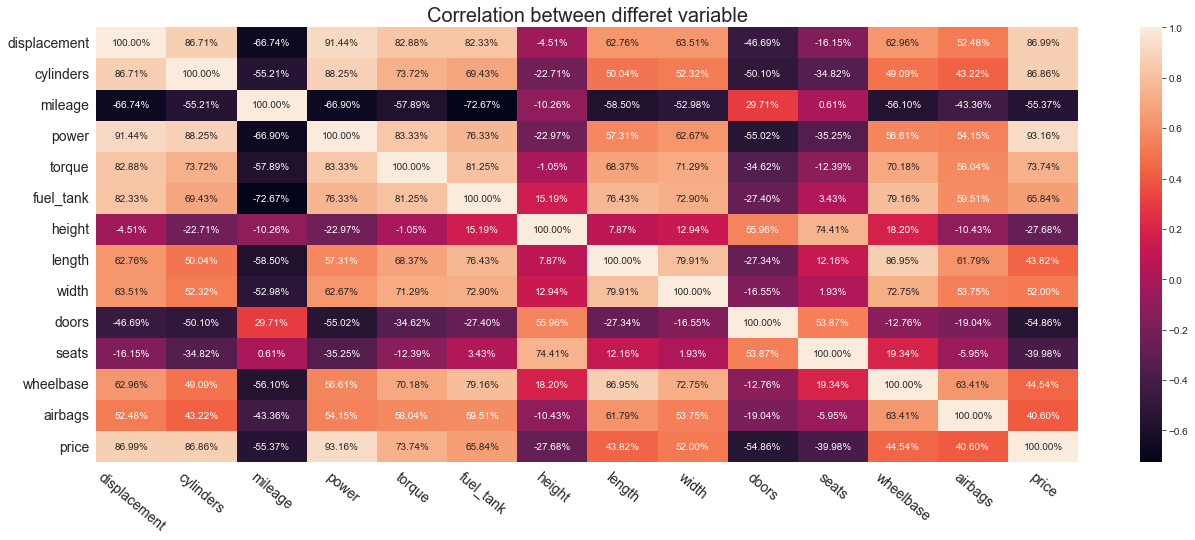

In [26]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

### The above heatmap shows the corelation between different variables in the dataset. 

## >Now we check an extensive scatter plot grid of more numerical variable to investigate the realtion in more detail

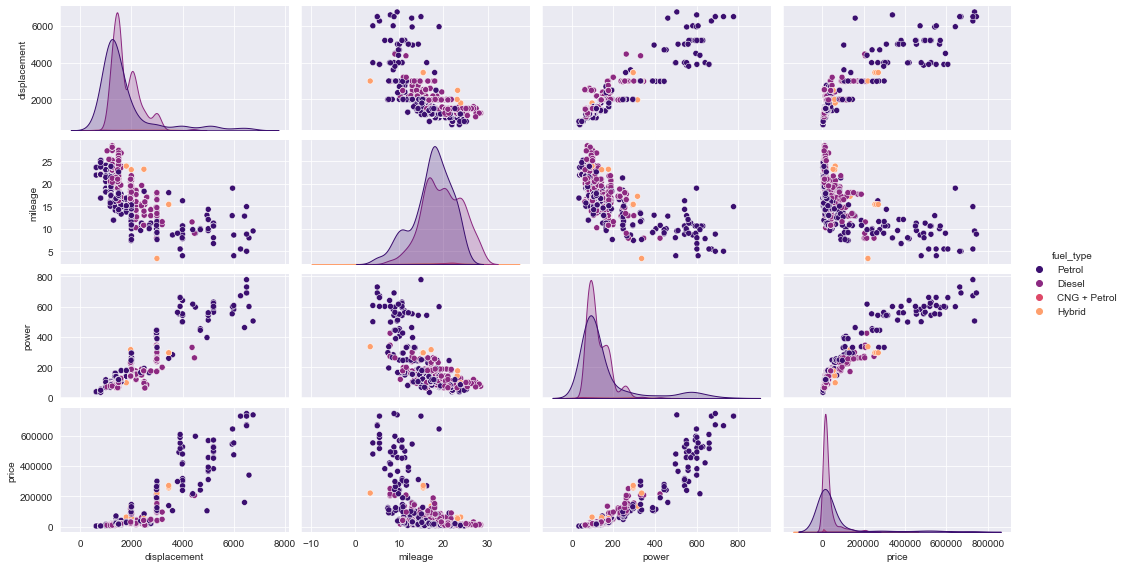

In [27]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

## > Now lets make a 3D scatter plot to check for obvious clusters with main features as price horsepower and mileage

### Now let us more interactive plot to show the previous plot and also adding the car manufacturer

In [28]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

### The above plot is a 3D Scatter plot of different Car models

## This is how the Automotive Industry could harness data to take informed decisions.

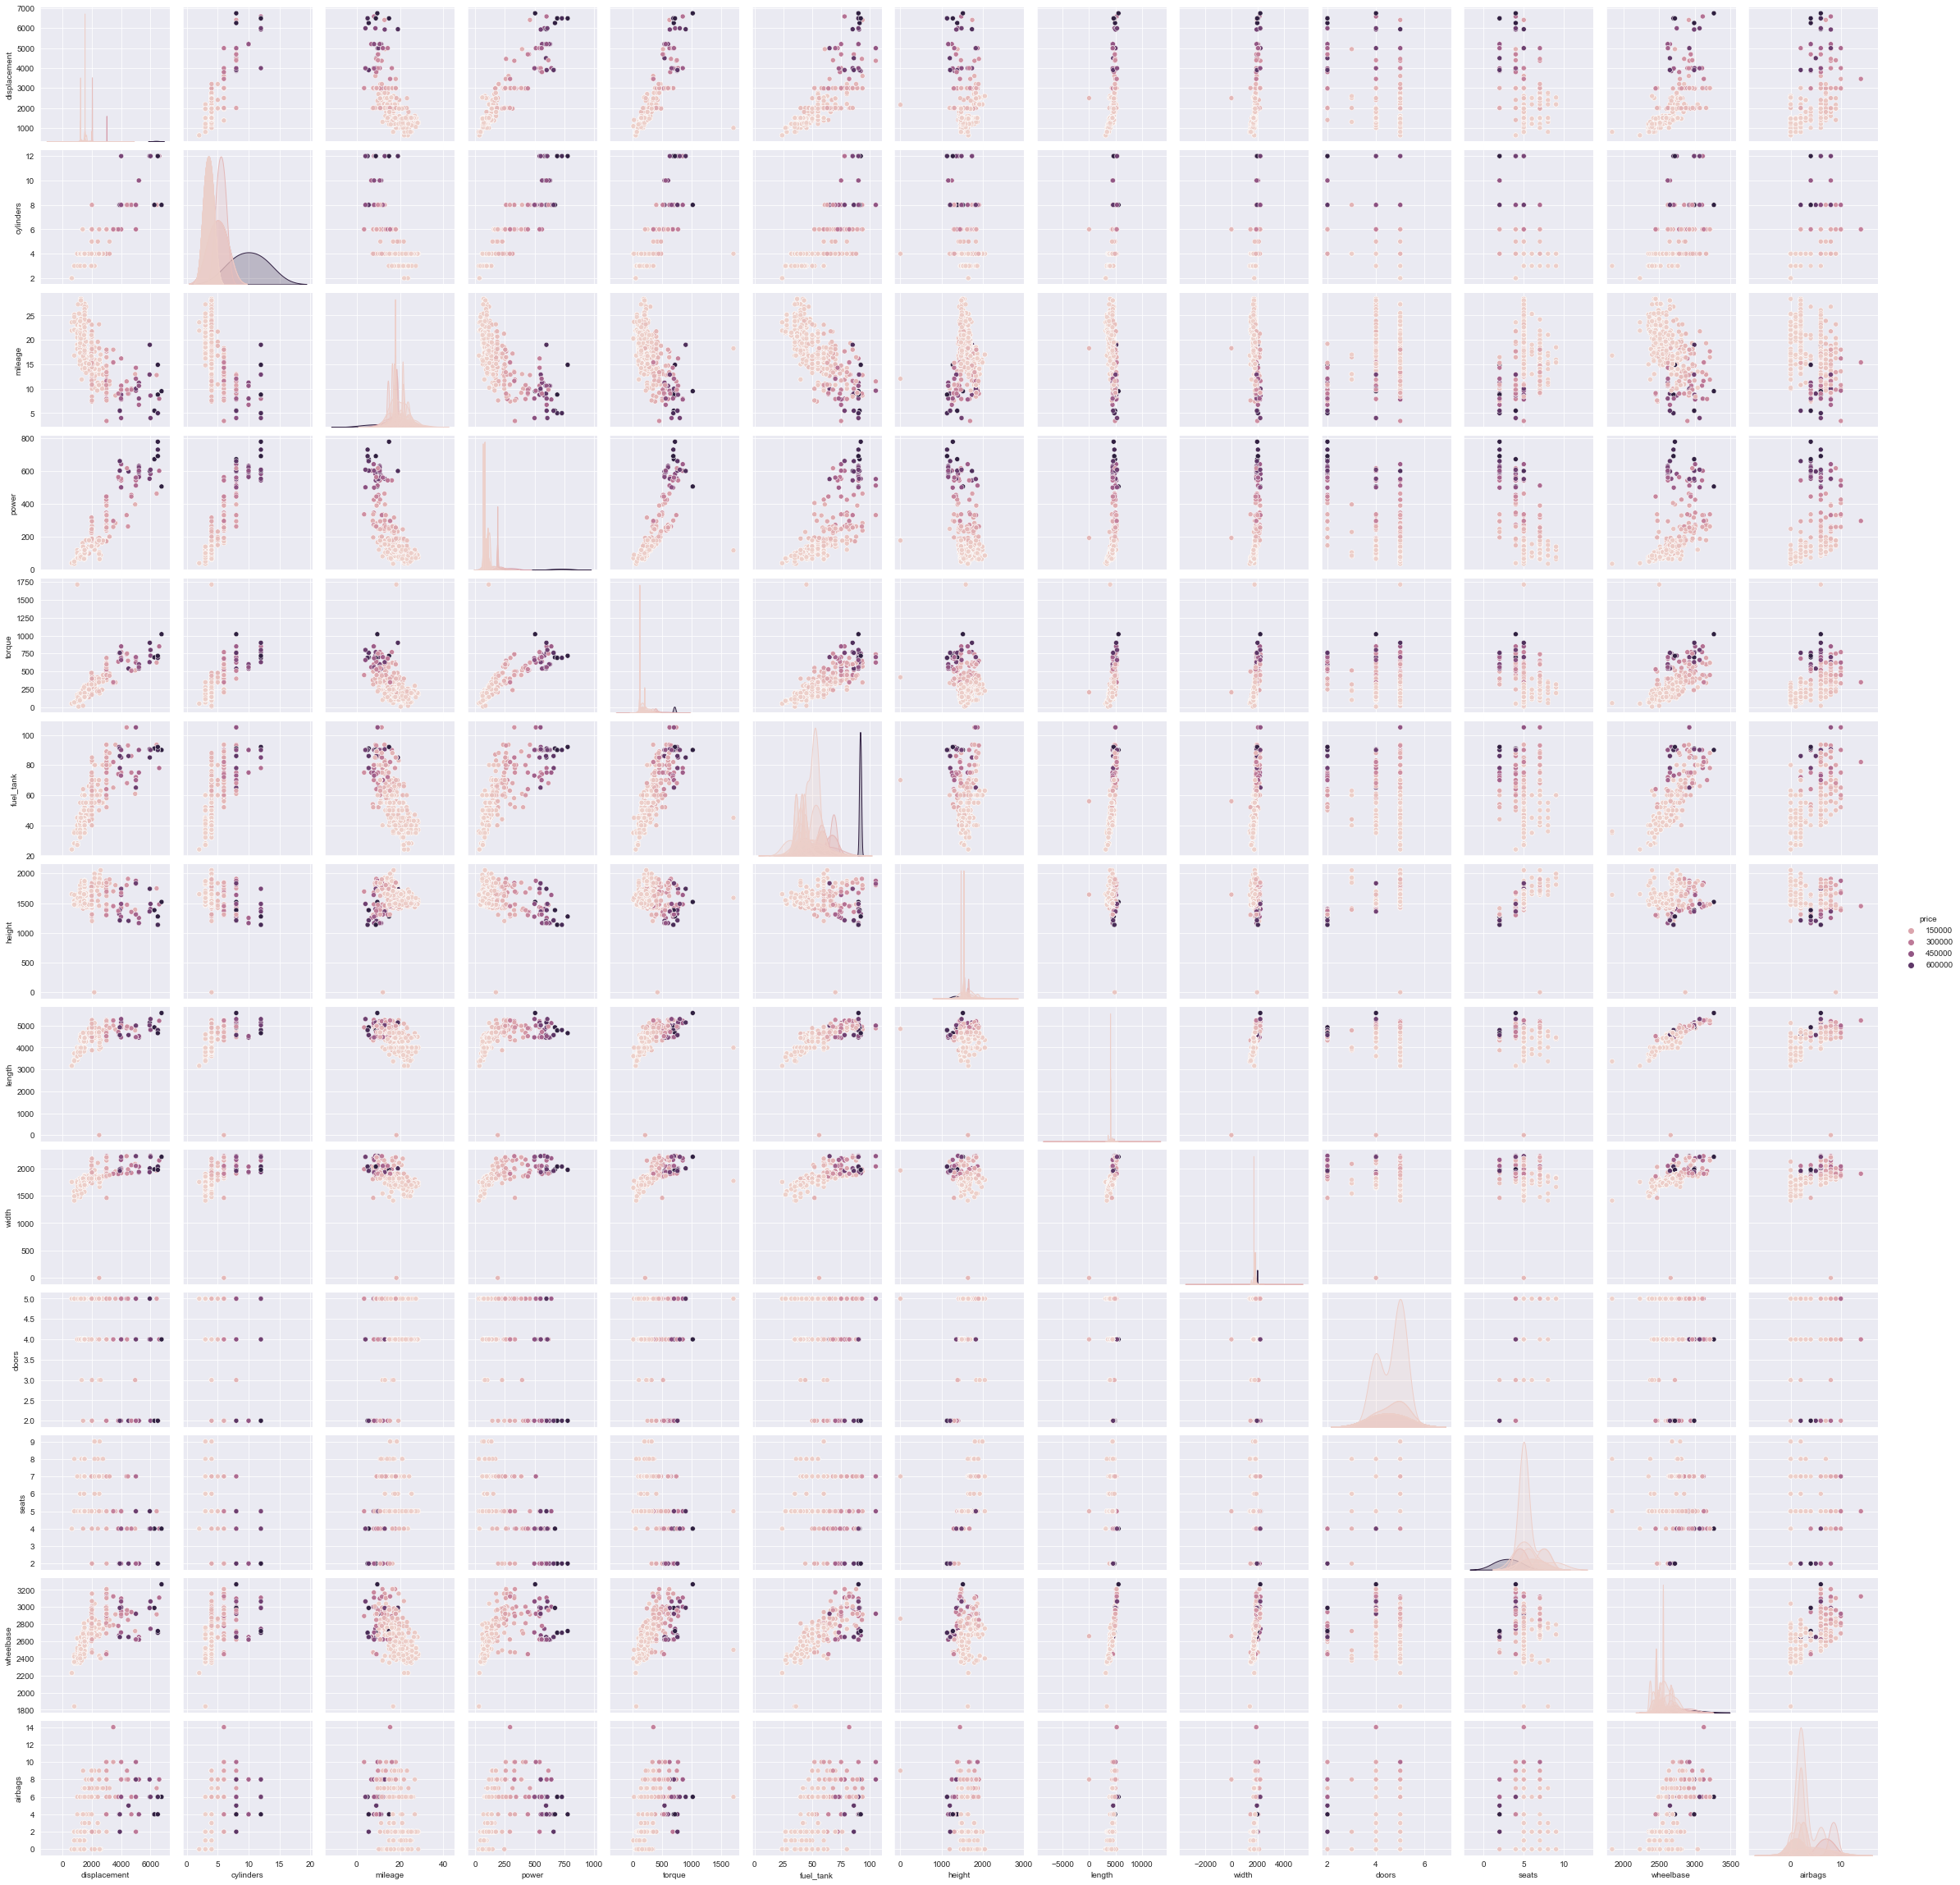

In [29]:
sns.pairplot(df,hue='price');